In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"


In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans


C:\Users\prani\anaconda3\python\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
feature_data = pd.read_csv("../features/market_features.csv")
feature_data["Date"] = pd.to_datetime(feature_data["Date"])
feature_data = feature_data.set_index("Date")

feature_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2658 entries, 2015-03-17 to 2025-12-30
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   returns         2658 non-null   float64
 1   volatility_20   2658 non-null   float64
 2   trend_strength  2658 non-null   float64
 3   range_20        2658 non-null   float64
dtypes: float64(4)
memory usage: 103.8 KB


In [4]:
X = feature_data.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
regimes = kmeans.fit_predict(X_scaled)

feature_data["regime"] = regimes


In [8]:
feature_data.groupby("regime").mean()


,returns,volatility_20,trend_strength,range_20
regime,,,,
0,0.000678,0.006886,0.017466,0.009052
1,-0.000005,0.011622,-0.011808,0.013681
2,0.001785,0.044208,-0.129444,0.046852


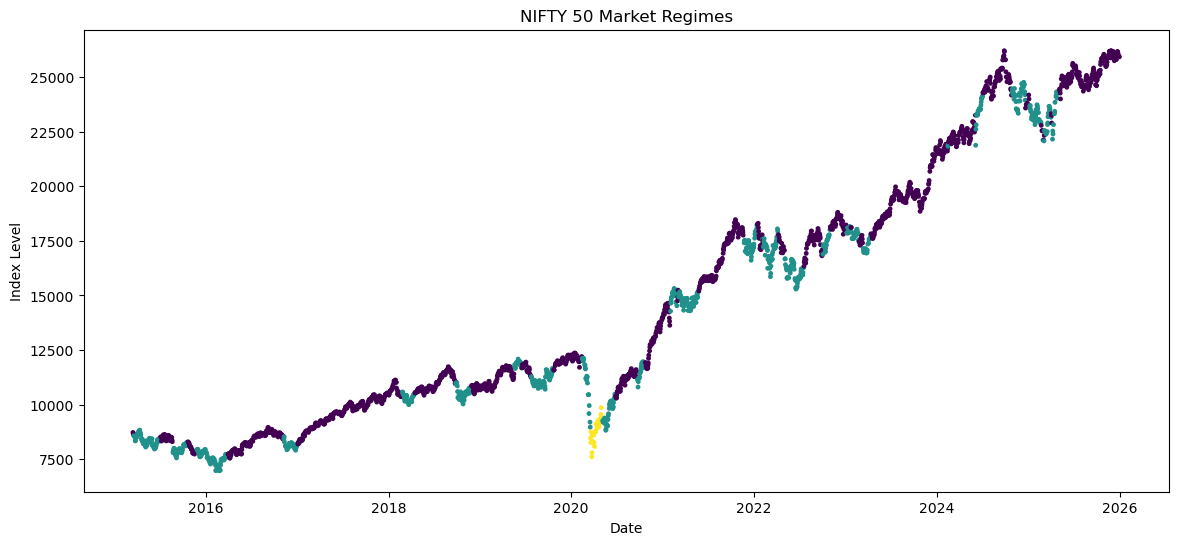

In [9]:
import matplotlib.pyplot as plt

# attach Close prices for visualization
close_prices = pd.read_csv(
    "../data/nifty50.csv",
    header=[0,1],
    index_col=0
)
close_prices.columns = close_prices.columns.get_level_values(0)
close_prices.index = pd.to_datetime(close_prices.index, errors="coerce")
close_prices = close_prices.dropna()

feature_data["Close"] = close_prices.loc[feature_data.index, "Close"]

plt.figure(figsize=(14,6))
plt.scatter(
    feature_data.index,
    feature_data["Close"],
    c=feature_data["regime"],
    cmap="viridis",
    s=6
)
plt.title("NIFTY 50 Market Regimes")
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.show()


In [10]:
feature_data["regime"] = regimes


In [11]:

feature_data.to_csv("../features/market_features_with_regime.csv")
